In [1]:
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.datasets import load_iris
data=load_iris()

In [2]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
import pandas as pd
iris_df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [5]:
iris_df['class']=data.target

In [6]:
iris_df['class']=iris_df['class'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])

In [7]:
iris_df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


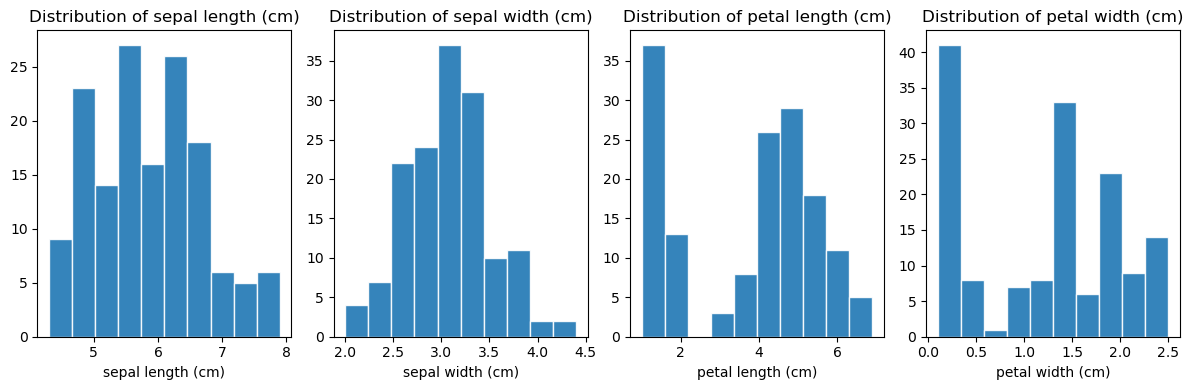

In [11]:
cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(12,4))
axes=fig.subplots(1,len(cols))
for i,col in enumerate(cols):
    axes[i].hist(iris_df[col],alpha=0.9,edgecolor='white')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    fig.tight_layout()
    

In [12]:
X=iris_df.drop('class',axis=1)
y=iris_df['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn import svm
from sklearn.svm import SVC
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
from sklearn.metrics import accuracy_score,classification_report
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
clsfn_report=classification_report(y_test,y_pred)
print("Accuracy of the model:",accuracy)


Accuracy of the model: 1.0


In [19]:
print("Classification report:\n",clsfn_report)

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
113,5.7,2.5,5.0,2.0
81,5.5,2.4,3.7,1.0
96,5.7,2.9,4.2,1.3
134,6.1,2.6,5.6,1.4
135,7.7,3.0,6.1,2.3


In [18]:
import numpy as np
new_x=np.array([[5.5,3.2,2.0,0.5]])
y_sample_pred=clf.predict(new_x)
print("Predicted class is:",y_sample_pred[0])

Predicted class is: setosa
